# Table of Contents 

### 1. Import Libraries 
### 2. Import data sets 
### 3. Data checks 
### 4. Visualisations
     a) Busiest day fo week and time of day
     b) Time of day most money is spent
     c) Most popular products - order frequency
     d) What’s the distribution among users in regards to their brand loyalty
     e) price range groupings
     f) differences in ordering habits
     

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 2. Import data sets

In [4]:
path = r'/Users/biancaskyehoney/Documents/Instacart Basket Analysis '

In [5]:
# Large merged df file path specified 
pickle_file_path = os.path.join(path, '02 Data', 'Prepared Data', 'df_2_added_customer_profiles.pkl')

# Read the Pickle file (large df) using pd.read_pickle()
df = pd.read_pickle(pickle_file_path)

In [6]:
# Departments file path 

df_departments = pd.read_csv(os.path.join(path, '02 Data', 'prepared data', 'departments_wrangled.csv'), index_col=0)

## 3. Data Checks 

In [5]:
df.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,income_profile,profile_family_shopper,profile_pet_owner,profile_late_night_shopper,profile_bulk_shopper,profile_weekend_shopper,profile_health_enthusiast,profile_convenience_shopper,profile_gourmet_foodie,profile_single_adult
0,2539329,1,1,2,8,NaN,1,196,1,0,...,Lower-Middle Income,False,False,False,False,False,False,False,False,False
1,2398795,1,2,3,7,15.0,0,196,1,1,...,Lower-Middle Income,False,False,False,False,False,False,False,False,False
2,473747,1,3,3,12,21.0,0,196,1,1,...,Lower-Middle Income,False,False,False,False,False,False,False,False,False
3,2254736,1,4,4,7,29.0,0,196,1,1,...,Lower-Middle Income,False,False,False,False,False,False,False,False,False
4,431534,1,5,4,15,28.0,0,196,1,1,...,Lower-Middle Income,False,False,False,False,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 53 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   order_id                     int64   
 1   user_id                      int64   
 2   order_number                 int64   
 3   orders_day_of_week           int64   
 4   order_hour_of_day            int64   
 5   days_since_prior_order       float64 
 6   first_order                  int64   
 7   product_id                   int64   
 8   add_to_cart_order            int64   
 9   reordered                    int64   
 10  product_name                 object  
 11  aisle_id                     int64   
 12  department_id                int64   
 13  prices                       float64 
 14  _merge                       category
 15  price_range_loc              object  
 16  busiest day                  object  
 17  day_category                 object  
 18  slowest_days        

In [7]:
df.shape

(32404859, 53)

In [7]:
# Find low activity customers - exclude from analysis < 5 orders 
df['exclusion'].value_counts(normalize=True)

0.0    0.955553
1.0    0.044447
Name: exclusion, dtype: float64

In [8]:
# exclude them
df = df[df['exclusion'] == 0]
df.shape

(30964564, 53)

In [9]:
df_departments

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


## 4. Visualisations

### Create smaller subsets for orders and customers 

In [10]:
# create a df that just lists orders (and only the necessary columns)
orders = df.drop_duplicates(subset='order_id')

In [11]:
# create a df that just lists customers
customers = df.drop_duplicates(subset=['user_id'])

In [12]:
#Check orders

orders.shape

(3064375, 53)

In [13]:
# check Customers

customers.shape

(162631, 53)

### a) Busiest day fo week and time of day

### Day of Week 

In [86]:
# Group the data by day of the week and count the number of orders for each day

order_counts = df['orders_day_of_week'].value_counts().sort_index()

In [160]:
# Define day labels for the x-axis

days = pd.DataFrame(data={'days':['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']})

Text(0.5, 1.0, 'Days of the week when orders are placed')

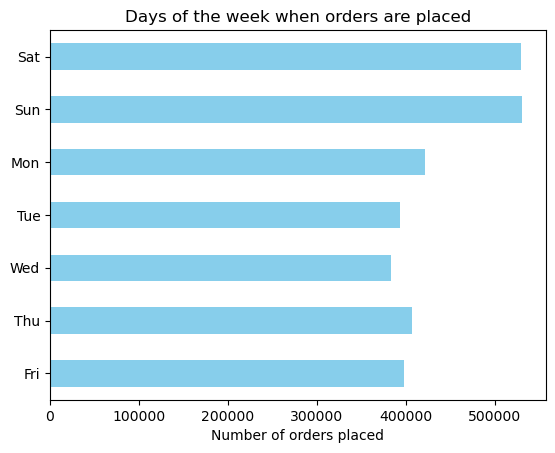

In [166]:
# Create a barh plot

data = orders['orders_day_of_week'].value_counts().sort_index(ascending=False).to_frame()
data = data.merge(days, how='inner', left_index=True, right_index=True).set_index('days')
busiest_dow_fig = data.plot.barh(color = "skyblue", 
                         legend=None)
plt.xlabel('Number of orders placed')
plt.ylabel('')
plt.title('Days of the week when orders are placed')

In [167]:
#export the visualization 
busiest_dow_fig.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'busiest_dow_fig.png'))

### Hour of Day 

In [92]:
# Group the data by hour of the day and count the number of orders for each hour
order_counts = df['order_hour_of_day'].value_counts().sort_index()

In [93]:
# Create hour labels for the x-axis
hour_labels = [f"{hour} - {hour+1}" for hour in range(24)]

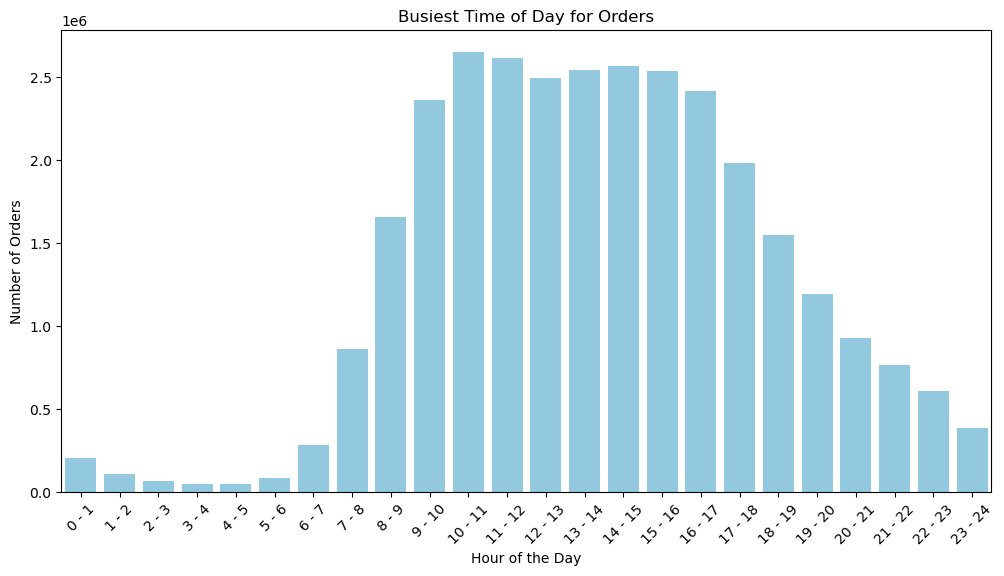

In [152]:
# Create a bar plot

busiest_hod_fig = plt.figure(figsize=(12, 6))
sns.barplot(x=hour_labels, y=order_counts, color="skyblue")
plt.title('Busiest Time of Day for Orders')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

In [173]:
#export the visualization 
busiest_hod_fig.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'busiest_hod_fig.png'), bbox_inches='tight')

## b) Time of day most money is spent

In [23]:
# Group the data by hour of the day and sum the total order cost for each hour

hourly_order_cost = df.groupby('order_hour_of_day')['total_order_cost'].sum()

In [24]:
# Create hour labels for the x-axis

hour_labels = [f"{hour} - {hour+1}" for hour in range(24)]

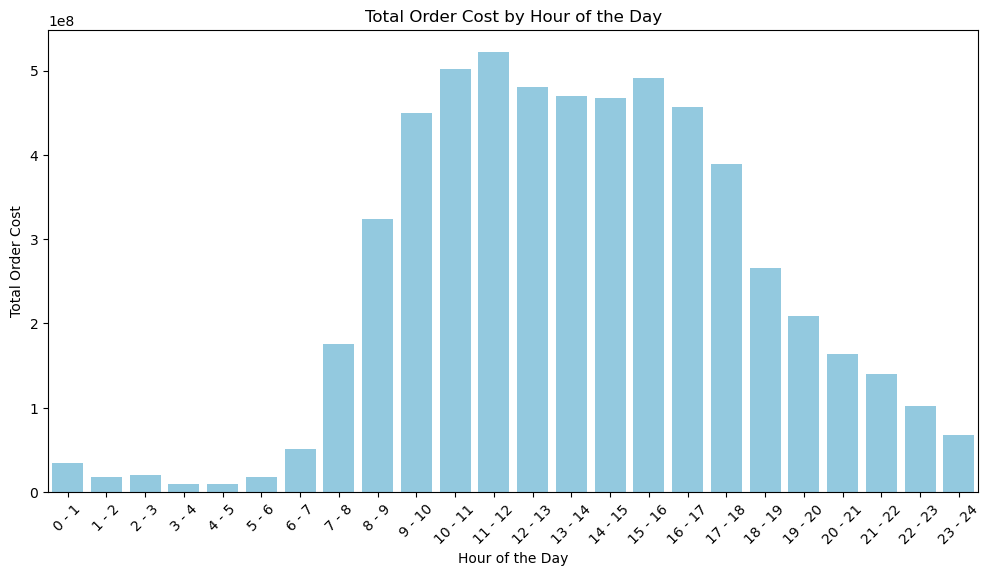

In [150]:
# Create a bar plot

total_order_cost_hour = plt.figure(figsize=(12, 6))
sns.barplot(x=hour_labels, y=hourly_order_cost, color="skyblue")
plt.title('Total Order Cost by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Order Cost')
plt.xticks(rotation=45)
plt.show()

In [172]:
#export the visualization 
total_order_cost_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'total_order_cost_hour.png'), bbox_inches='tight')

In [26]:
## total orders and amount spent per day look exactly the same 
## - not sure if it's worth presenting both but will note that this is the case in final report

## c) Most popular products - order frequency

Text(0.5, 0, 'Number of products')

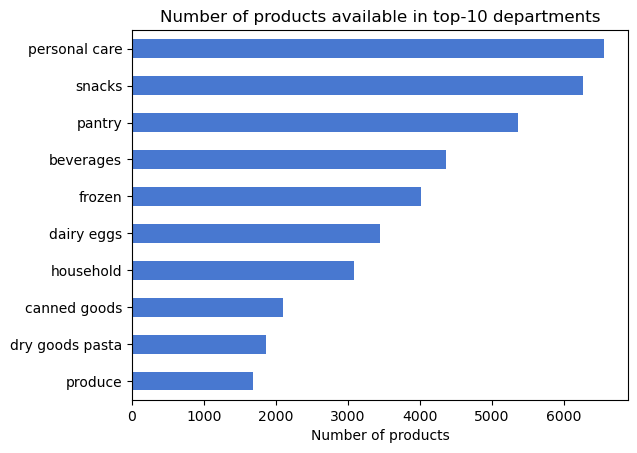

In [98]:
data = (df[['department', 'product_id']].groupby(['department'])
        .nunique().sort_values(by='product_id')).tail(10)
top_10_prods = data.plot.barh(color = sns.color_palette("muted")[0], legend=None)
plt.title('Number of products available in top-10 departments')
plt.ylabel('')
plt.xlabel('Number of products')

In [170]:
#export the visualization 
top_10_prods.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'top_10_prods.png'), bbox_inches='tight')

Text(0.5, 1.0, 'Number of products sold in top-10 departments')

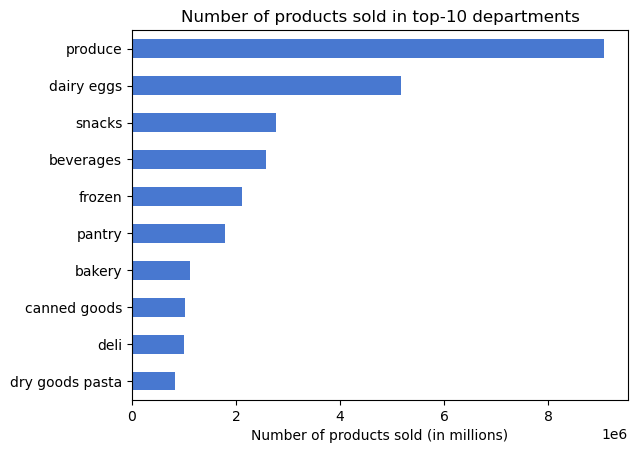

In [101]:
#The most number of products are purchased from the produce department

data = df['department'].value_counts().sort_values().tail(10)
top_10_depts = data.plot.barh(color = sns.color_palette("muted")[0], legend=None)
plt.xlabel('Number of products sold (in millions)')
plt.title('Number of products sold in top-10 departments')

In [169]:
#export the visualization 
top_10_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'top_10_depts.png'), bbox_inches='tight')

## d) What’s the distribution among users in regards to their brand loyalty

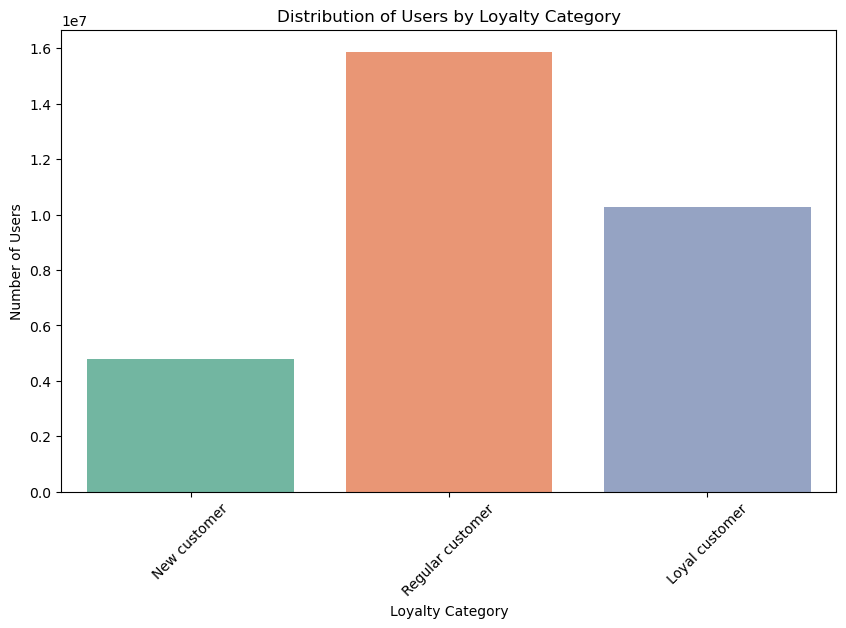

In [103]:
# Create a countplot to visualize the distribution of users in loyalty categories

loyalty_dist_fig = plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loyalty_flag', palette='Set2')  
plt.title('Distribution of Users by Loyalty Category')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

In [174]:
#export the visualization 
loyalty_dist_fig.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyalty_dist_fig.png'), bbox_inches='tight')

## e) Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Text(0.5, 1.0, 'Histogram: Prices of products purchased')

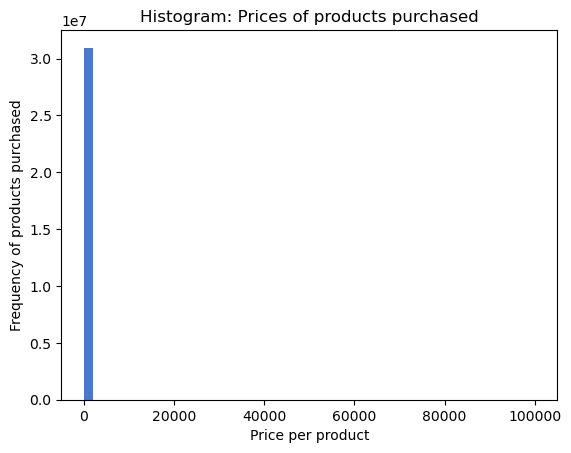

In [30]:
hist_prices = df['prices'].plot.hist(bins=50, color = sns.color_palette("muted")[0])
plt.xlabel('Price per product')
plt.ylabel('Frequency of products purchased')
plt.title('Histogram: Prices of products purchased')

In [31]:
df['prices'].describe()

count    3.096456e+07
mean     1.193352e+01
std      4.913444e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [32]:
# check for 'abnormal' pricing range

df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,reordered,...,income_profile,profile_family_shopper,profile_pet_owner,profile_late_night_shopper,profile_bulk_shopper,profile_weekend_shopper,profile_health_enthusiast,profile_convenience_shopper,profile_gourmet_foodie,profile_single_adult
2689220,1435153,1519,26,2,11,6.0,0,21553,15,0,...,High Income,False,False,False,False,False,True,False,False,True
2689221,1066435,1519,32,3,10,5.0,0,21553,28,1,...,High Income,False,False,False,False,False,True,False,False,True
2690280,1697208,2409,33,1,19,5.0,0,21553,1,0,...,High Income,False,False,False,False,True,True,False,False,False
2691037,965345,3531,27,2,19,8.0,0,33664,2,0,...,High Income,False,False,False,False,False,True,False,False,False
2691042,2943740,3793,1,2,9,NaN,1,21553,3,0,...,High Income,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8074433,3138833,51346,1,6,4,NaN,1,33664,1,0,...,High Income,False,False,False,False,False,True,False,False,False
8074434,1275440,51346,3,2,7,11.0,0,33664,5,1,...,High Income,False,False,False,False,False,True,False,False,False
8074435,3265389,51346,4,1,17,13.0,0,33664,2,1,...,High Income,False,False,False,False,True,True,False,False,False
8075141,1179092,131671,12,4,9,15.0,0,33664,1,0,...,Upper-Middle Income,False,False,False,False,False,True,False,False,True


In [33]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [34]:
df['prices'].max()

25.0

<Axes: ylabel='Frequency'>

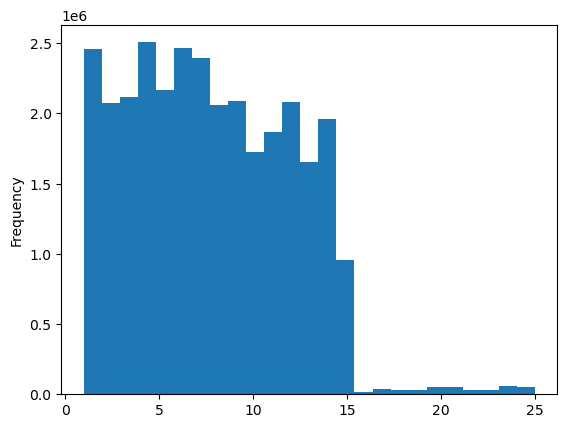

In [35]:
# replot histogram

df['prices'].plot.hist(bins = 25)

In [16]:
# Defining price range 

def assign_price_range(price):
    if price <= 5:
        return 'Low Price'
    elif price <= 15:
        return 'Medium Price'
    elif price <= 25:
        return 'High Price'
    else:
        return 'High Price'

In [17]:
# Apply function to dataframe

df['price_range'] = df['prices'].apply(assign_price_range)

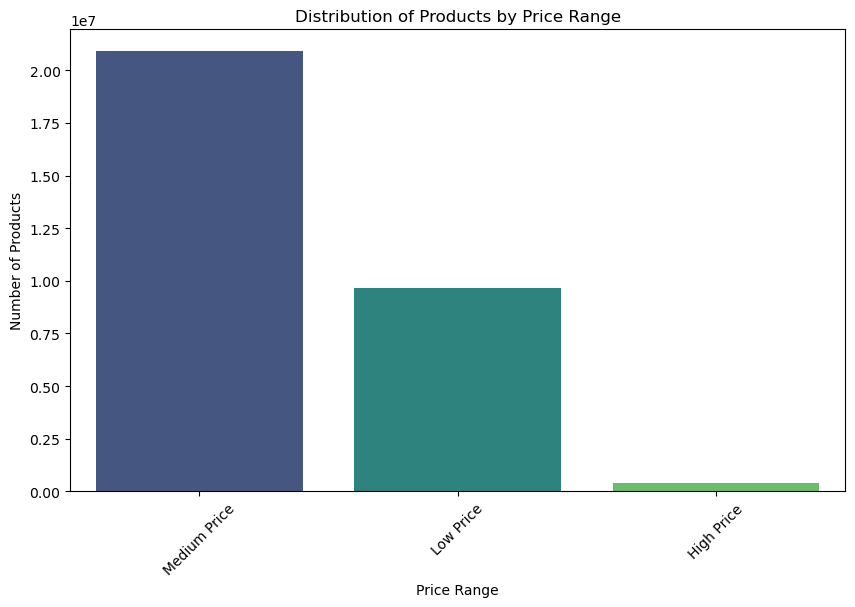

In [40]:
# Visualise 

dist_prod_price_range = plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range', palette='viridis')
plt.title('Distribution of Products by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

In [175]:
#export the visualization 
dist_prod_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'dist_prod_price_range.png'), bbox_inches='tight')

### Visualize departments in different price ranges 

In [19]:
# Create a pivot table to count the number of products in each department within each price range
pivot_table = df.pivot_table(index='department', columns='price_range', values='product_id', aggfunc='count', fill_value=0)

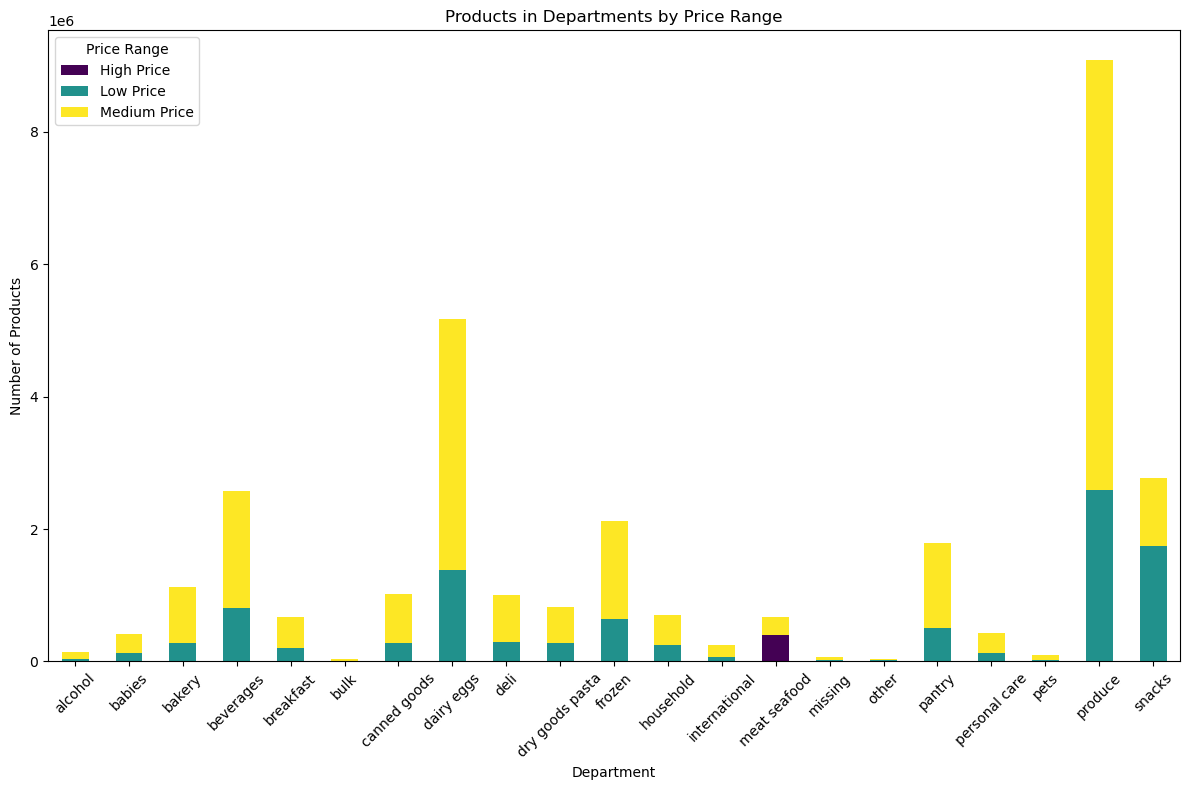

In [39]:
# Create a stacked bar chart
departments_price_ranges = figure, ax = plt.subplots(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
plt.title('Products in Departments by Price Range')
plt.xlabel('Department')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.legend(title='Price Range')
plt.tight_layout()
plt.show()

In [30]:
#export the visualization 
fig.savefig(os.path.join(path, '04 Analysis','Visualisations', 'departments_price_ranges.png'), bbox_inches='tight')

## f) Are there differences in ordering habits based on a customer’s loyalty status? 

### orders and loyalty status

In [39]:
# Creating a stacked bar chart to show highest order day as well as lyalty status to target customers accordingly
# Subset your data to include only relevant columns

loyalty_data = df[['orders_day_of_week', 'loyalty_flag']]

In [40]:
# Group by day of the week and loyalty status, and count the number of orders

loyalty_counts = loyalty_data.groupby(['orders_day_of_week', 'loyalty_flag']).size().unstack()

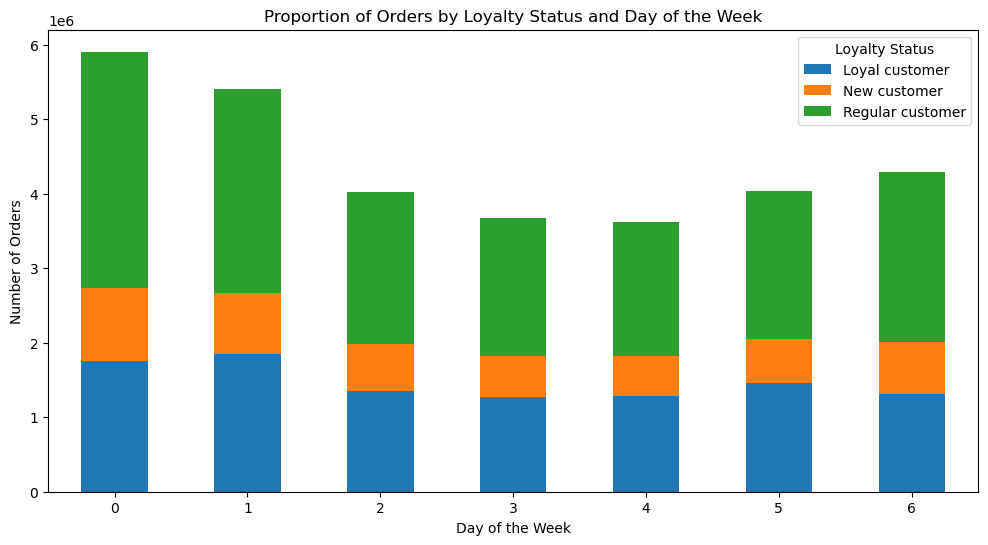

In [107]:
# Create a stacked bar plot

loyatly_status_dow = loyalty_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Proportion of Orders by Loyalty Status and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Loyalty Status', loc='upper right')
plt.show()

In [108]:
#export the visualization 
loyatly_status_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'loyatly_status_dow.png'))

### orders and region

In [42]:
# Subset data to include only relevant columns

region_data = df[['region', 'orders_day_of_week']]

In [43]:
# Group by region and day of the week, and count the number of orders

region_counts = region_data.groupby(['region', 'orders_day_of_week']).size().unstack()

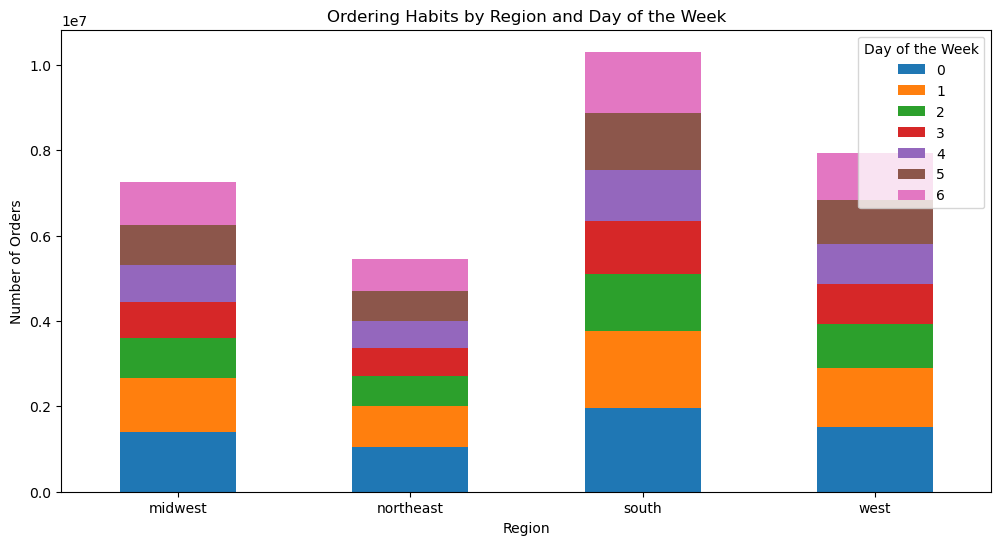

In [109]:
# Create a stacked bar plot

order_habits_region_dow = region_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Ordering Habits by Region and Day of the Week')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Day of the Week', loc='upper right')
plt.show()

In [110]:
#export the visualization 
order_habits_region_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'order_habits_region_dow.png'))

### orders and region - depts

In [12]:
# Group by 'region' and 'department', and calculate the department count
department_counts = df.groupby(['region', 'department'])['department'].count().reset_index(name='department_count')

In [13]:
# Sort the data by 'region' and 'department_count' in descending order
department_counts = department_counts.sort_values(['region', 'department_count'], ascending=[True, False])

In [14]:
# Create a dictionary to store the top 10 departments per region
top_departments_per_region = {}

In [15]:
# Iterate over the regions and select the top 10 departments for each
regions = df['region'].unique()
for region in regions:
    top_departments = department_counts[department_counts['region'] == region].head(10)
    top_departments_per_region[region] = top_departments

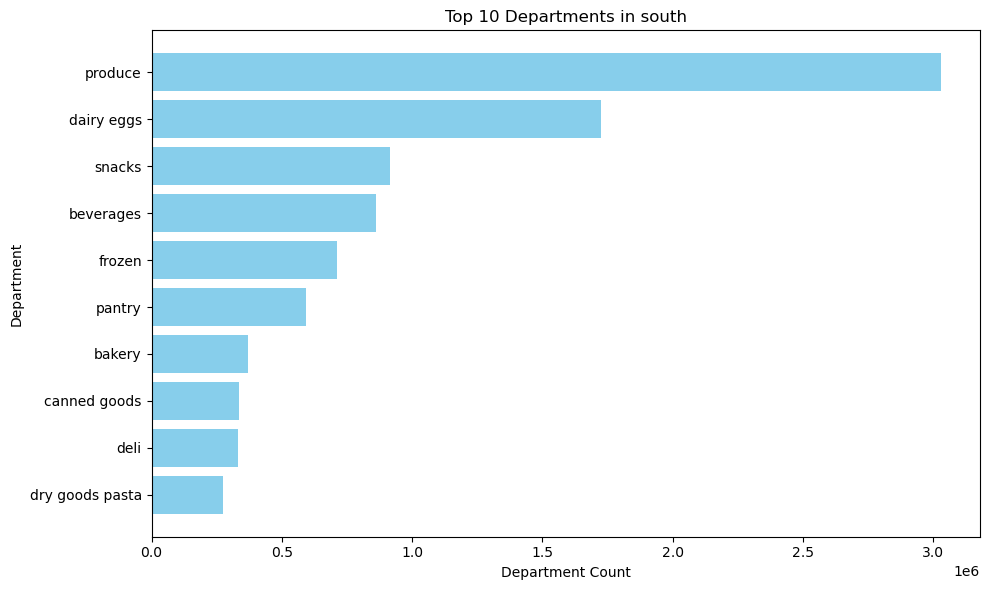

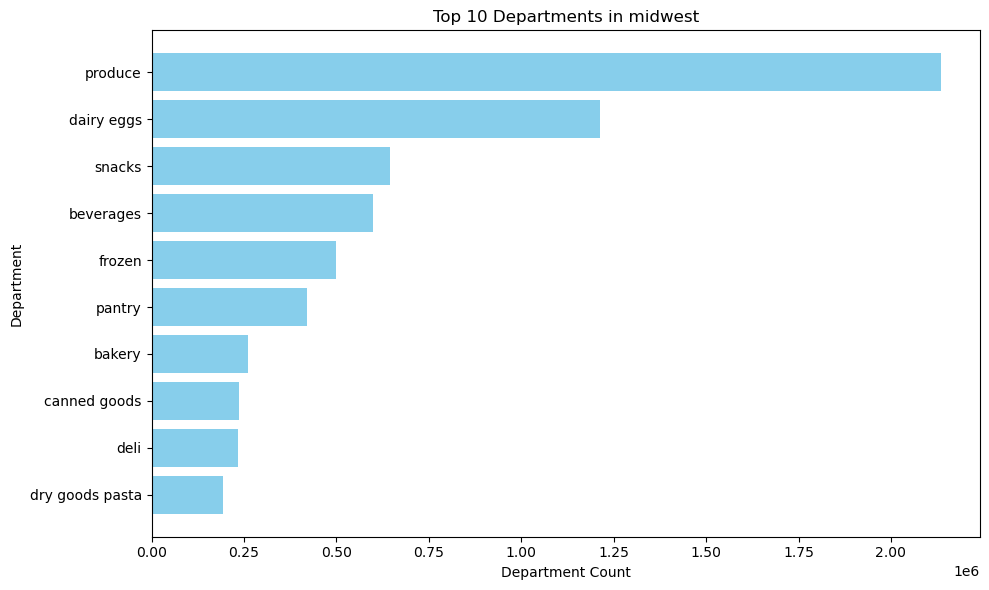

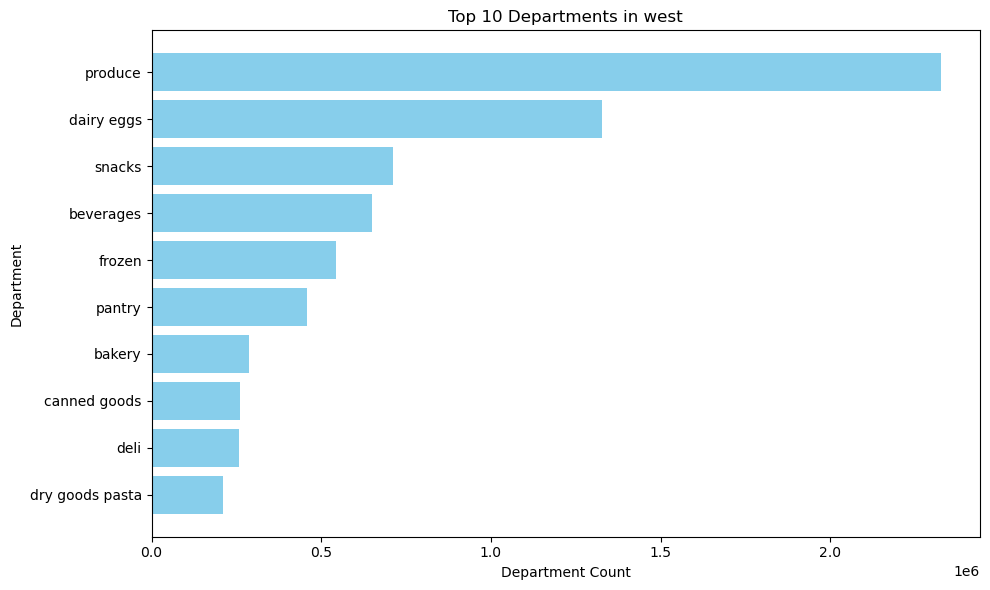

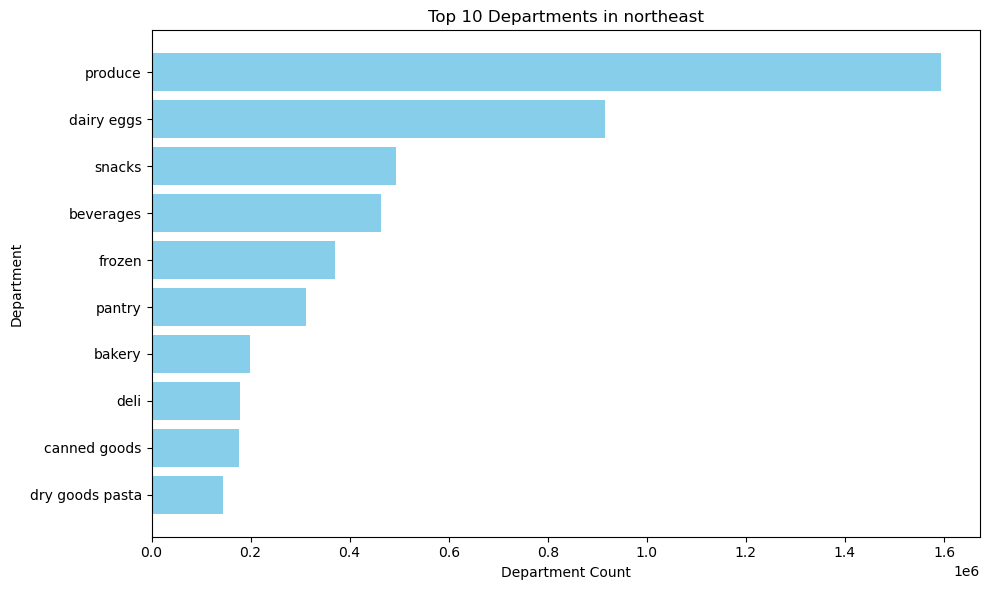

In [38]:
# Create a bar chart for each region
for region, top_departments in top_departments_per_region.items():
    plt.figure(figsize=(10, 6))
    top_depart_region = plt.barh(top_departments['department'], top_departments['department_count'], color='skyblue')
    plt.xlabel('Department Count')
    plt.ylabel('Department')
    plt.title(f'Top 10 Departments in {region}')
    plt.gca().invert_yaxis()  
    plt.tight_layout()

In [50]:
# Create the directory if it doesn't exist
os.makedirs(os.path.join(path, '04 Analysis', 'Visualisations'), exist_ok=True)
    
# Save the figure with a unique filename based on the region
filename = f'top_departments_in_{region}.png'
filepath = os.path.join(path, '04 Analysis', 'Visualisations', f'top_departments_in_{region}.png')
    
try:
    plt.savefig(filepath, bbox_inches='tight')
    print(f'Saved visualization for {region} to {filepath}')
except Exception as e:
        print(f'Error saving visualization for {region}: {str(e)}')
    
plt.close()  # Close the figure to release memory

Saved visualization for northeast to /Users/biancaskyehoney/Documents/Instacart Basket Analysis /04 Analysis/Visualisations/top_departments_in_northeast.png


### avg order cost per region

In [52]:
# Group by 'region' and calculate the average order cost within each region
average_order_cost_per_region = df.groupby('region')['total_order_cost'].mean().reset_index()

# Rename the columns for clarity
average_order_cost_per_region.columns = ['region', 'average_order_cost']

# Display the result
print(average_order_cost_per_region)

      region  average_order_cost
0    midwest          201.670101
1  northeast          182.556076
2      south          188.885493
3       west          179.926036


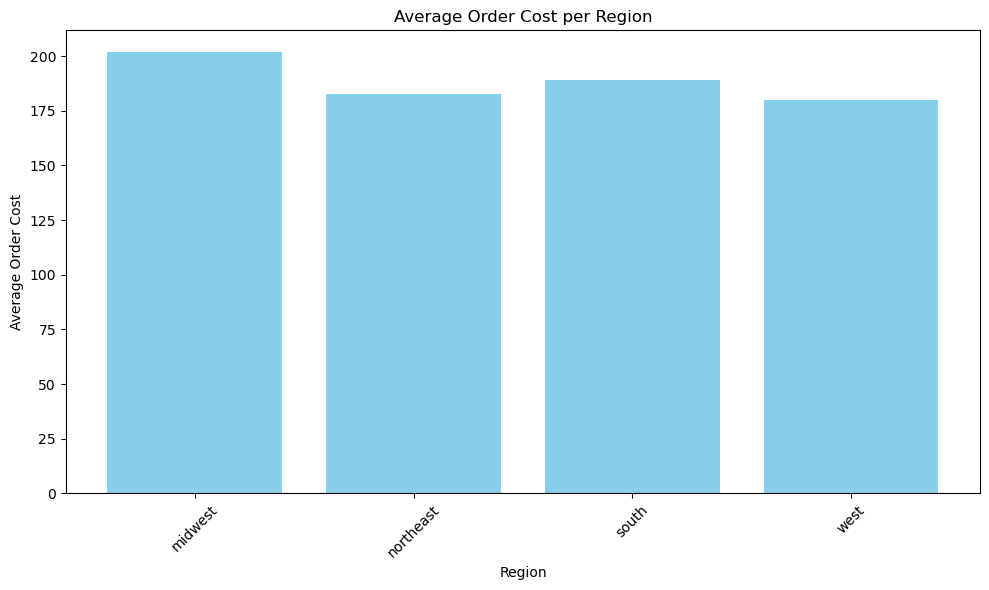

In [57]:
# Create a bar chart
avg_order_cost_per_region = plt.figure(figsize=(10, 6))
plt.bar(average_order_cost_per_region['region'], average_order_cost_per_region['average_order_cost'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Average Order Cost')
plt.title('Average Order Cost per Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()


In [58]:
#export the visualization 
avg_order_cost_per_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'avg_order_cost_per_region.png'))

In [41]:
# Create a pivot table
pivot_table = df.pivot_table(index='region', values=['user_id', 'avg_order_cost', 'total_order_cost'], aggfunc={'user_id': 'nunique', 'avg_order_cost': 'mean', 'total_order_cost': 'mean'})

# Rename the columns for clarity
pivot_table = pivot_table.rename(columns={'user_id': 'Number of Customers', 'avg_order_cost': 'Average Order Cost', 'total_order_cost': 'Average Total Order Value'})

# Display the pivot table
print(pivot_table)

           Average Order Cost  Average Total Order Value  Number of Customers
region                                                                       
midwest            170.084647                 201.670101                38376
northeast          154.129500                 182.556076                28581
south              158.479840                 188.885493                54193
west               150.989782                 179.926036                41481


### Marital status and order cost 

In [59]:
# Group by 'fam_status' and calculate the average order cost within each marital status group
average_order_cost_by_marital = df.groupby('fam_status')['total_order_cost'].mean().reset_index()

# Rename the columns for clarity
average_order_cost_by_marital.columns = ['Marital Status', 'Average Order Cost']


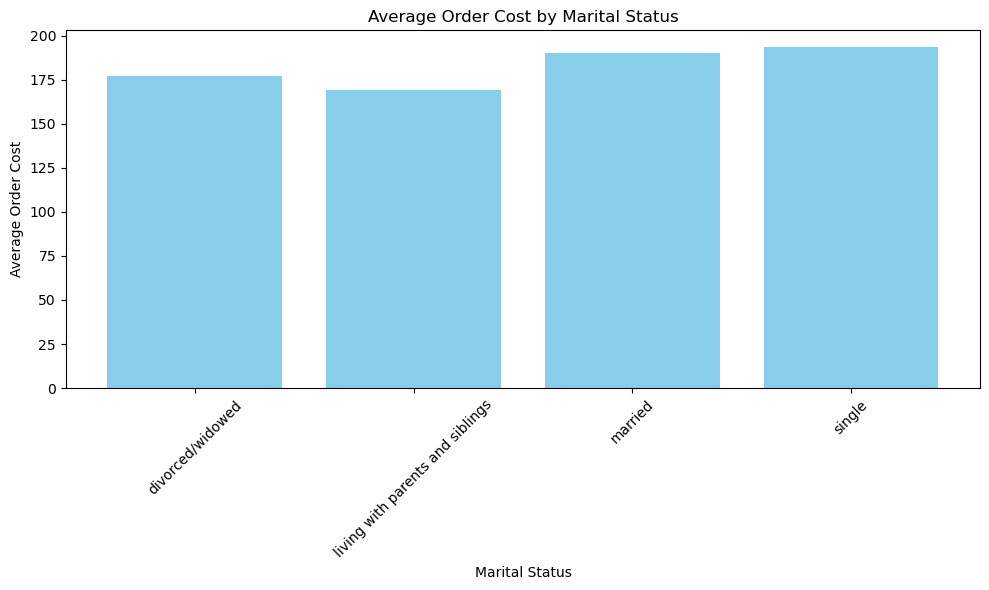

In [61]:
# Create a bar chart
marital_order_cost = plt.figure(figsize=(10, 6))
plt.bar(average_order_cost_by_marital['Marital Status'], average_order_cost_by_marital['Average Order Cost'], color='skyblue')
plt.xlabel('Marital Status')
plt.ylabel('Average Order Cost')
plt.title('Average Order Cost by Marital Status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.tight_layout()

In [62]:
#export the visualization 
marital_order_cost.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'marital_order_cost.png'))

##  g) Customer profiling

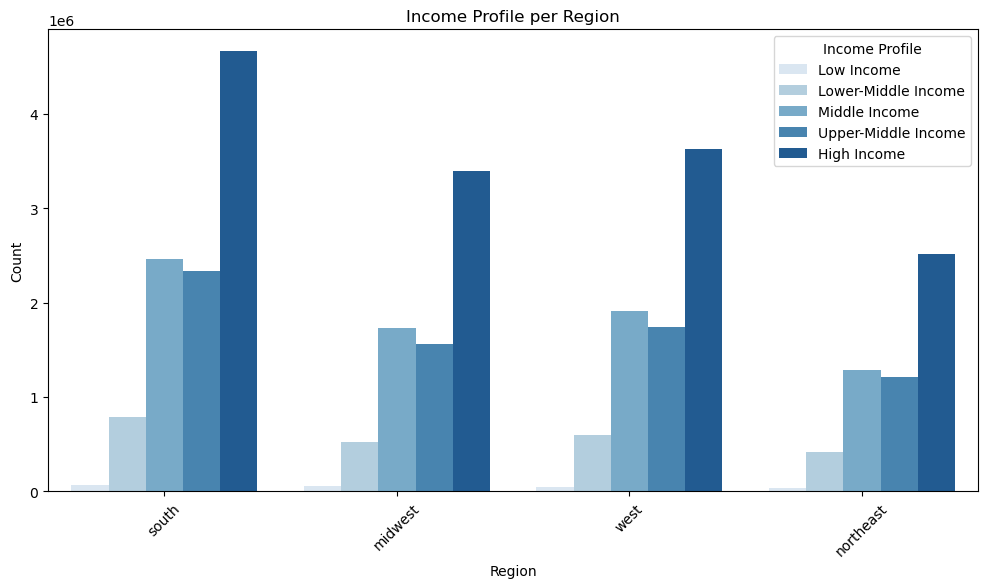

In [126]:
# bar plot for income profile per region
income_profile_per_region = plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='region', hue='income_profile', palette='Blues')
plt.title('Income Profile per Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income Profile')
plt.show()

In [177]:
#export the visualization 
income_profile_per_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'income_profile_per_region.png'), bbox_inches='tight')

### customer profiles per region

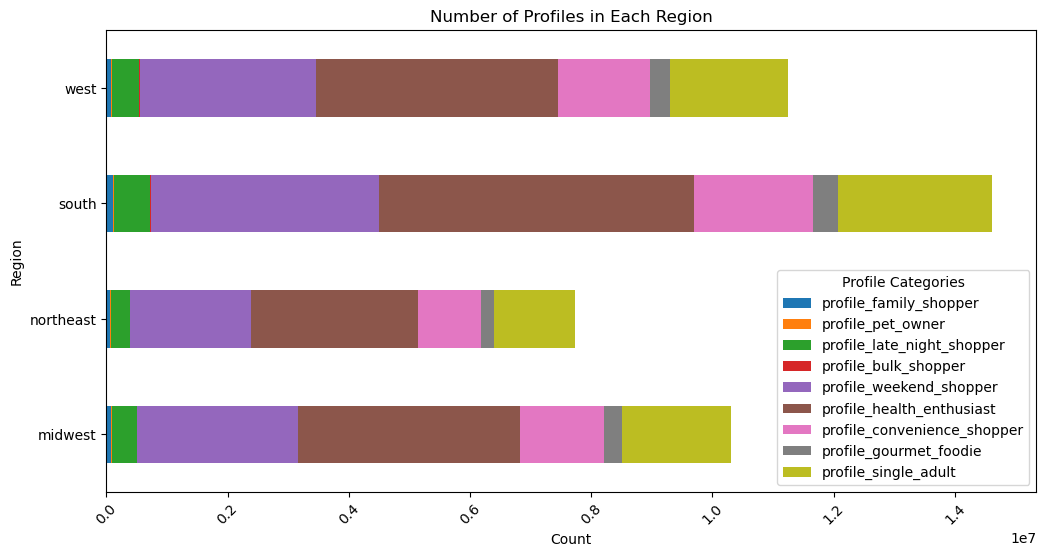

In [128]:
# Create a DataFrame to count the number of profiles in each region
profile_counts = df.groupby('region')[[
    'profile_family_shopper',
    'profile_pet_owner',
    'profile_late_night_shopper',
    'profile_bulk_shopper',
    'profile_weekend_shopper',
    'profile_health_enthusiast',
    'profile_convenience_shopper',
    'profile_gourmet_foodie',
    'profile_single_adult'
]].sum().reset_index()

# Set the region column as the index
profile_counts.set_index('region', inplace=True)

# Create a stacked bar plot
profile_per_region = profile_counts.plot(kind='barh', stacked=True, figsize=(12, 6))
plt.title('Number of Profiles in Each Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.xticks(rotation=45)
plt.legend(title='Profile Categories', loc='lower right')
plt.show()


In [129]:
#export the visualization 
profile_per_region.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'profile_per_region.png'))

In [58]:
# Define a list of profile category columns
profile_columns = [
    'profile_family_shopper',
    'profile_pet_owner',
    'profile_late_night_shopper',
    'profile_weekend_shopper',
    'profile_gourmet_foodie',
    'profile_single_adult',
    'profile_health_enthusiast',
    'profile_convenience_shopper'
]


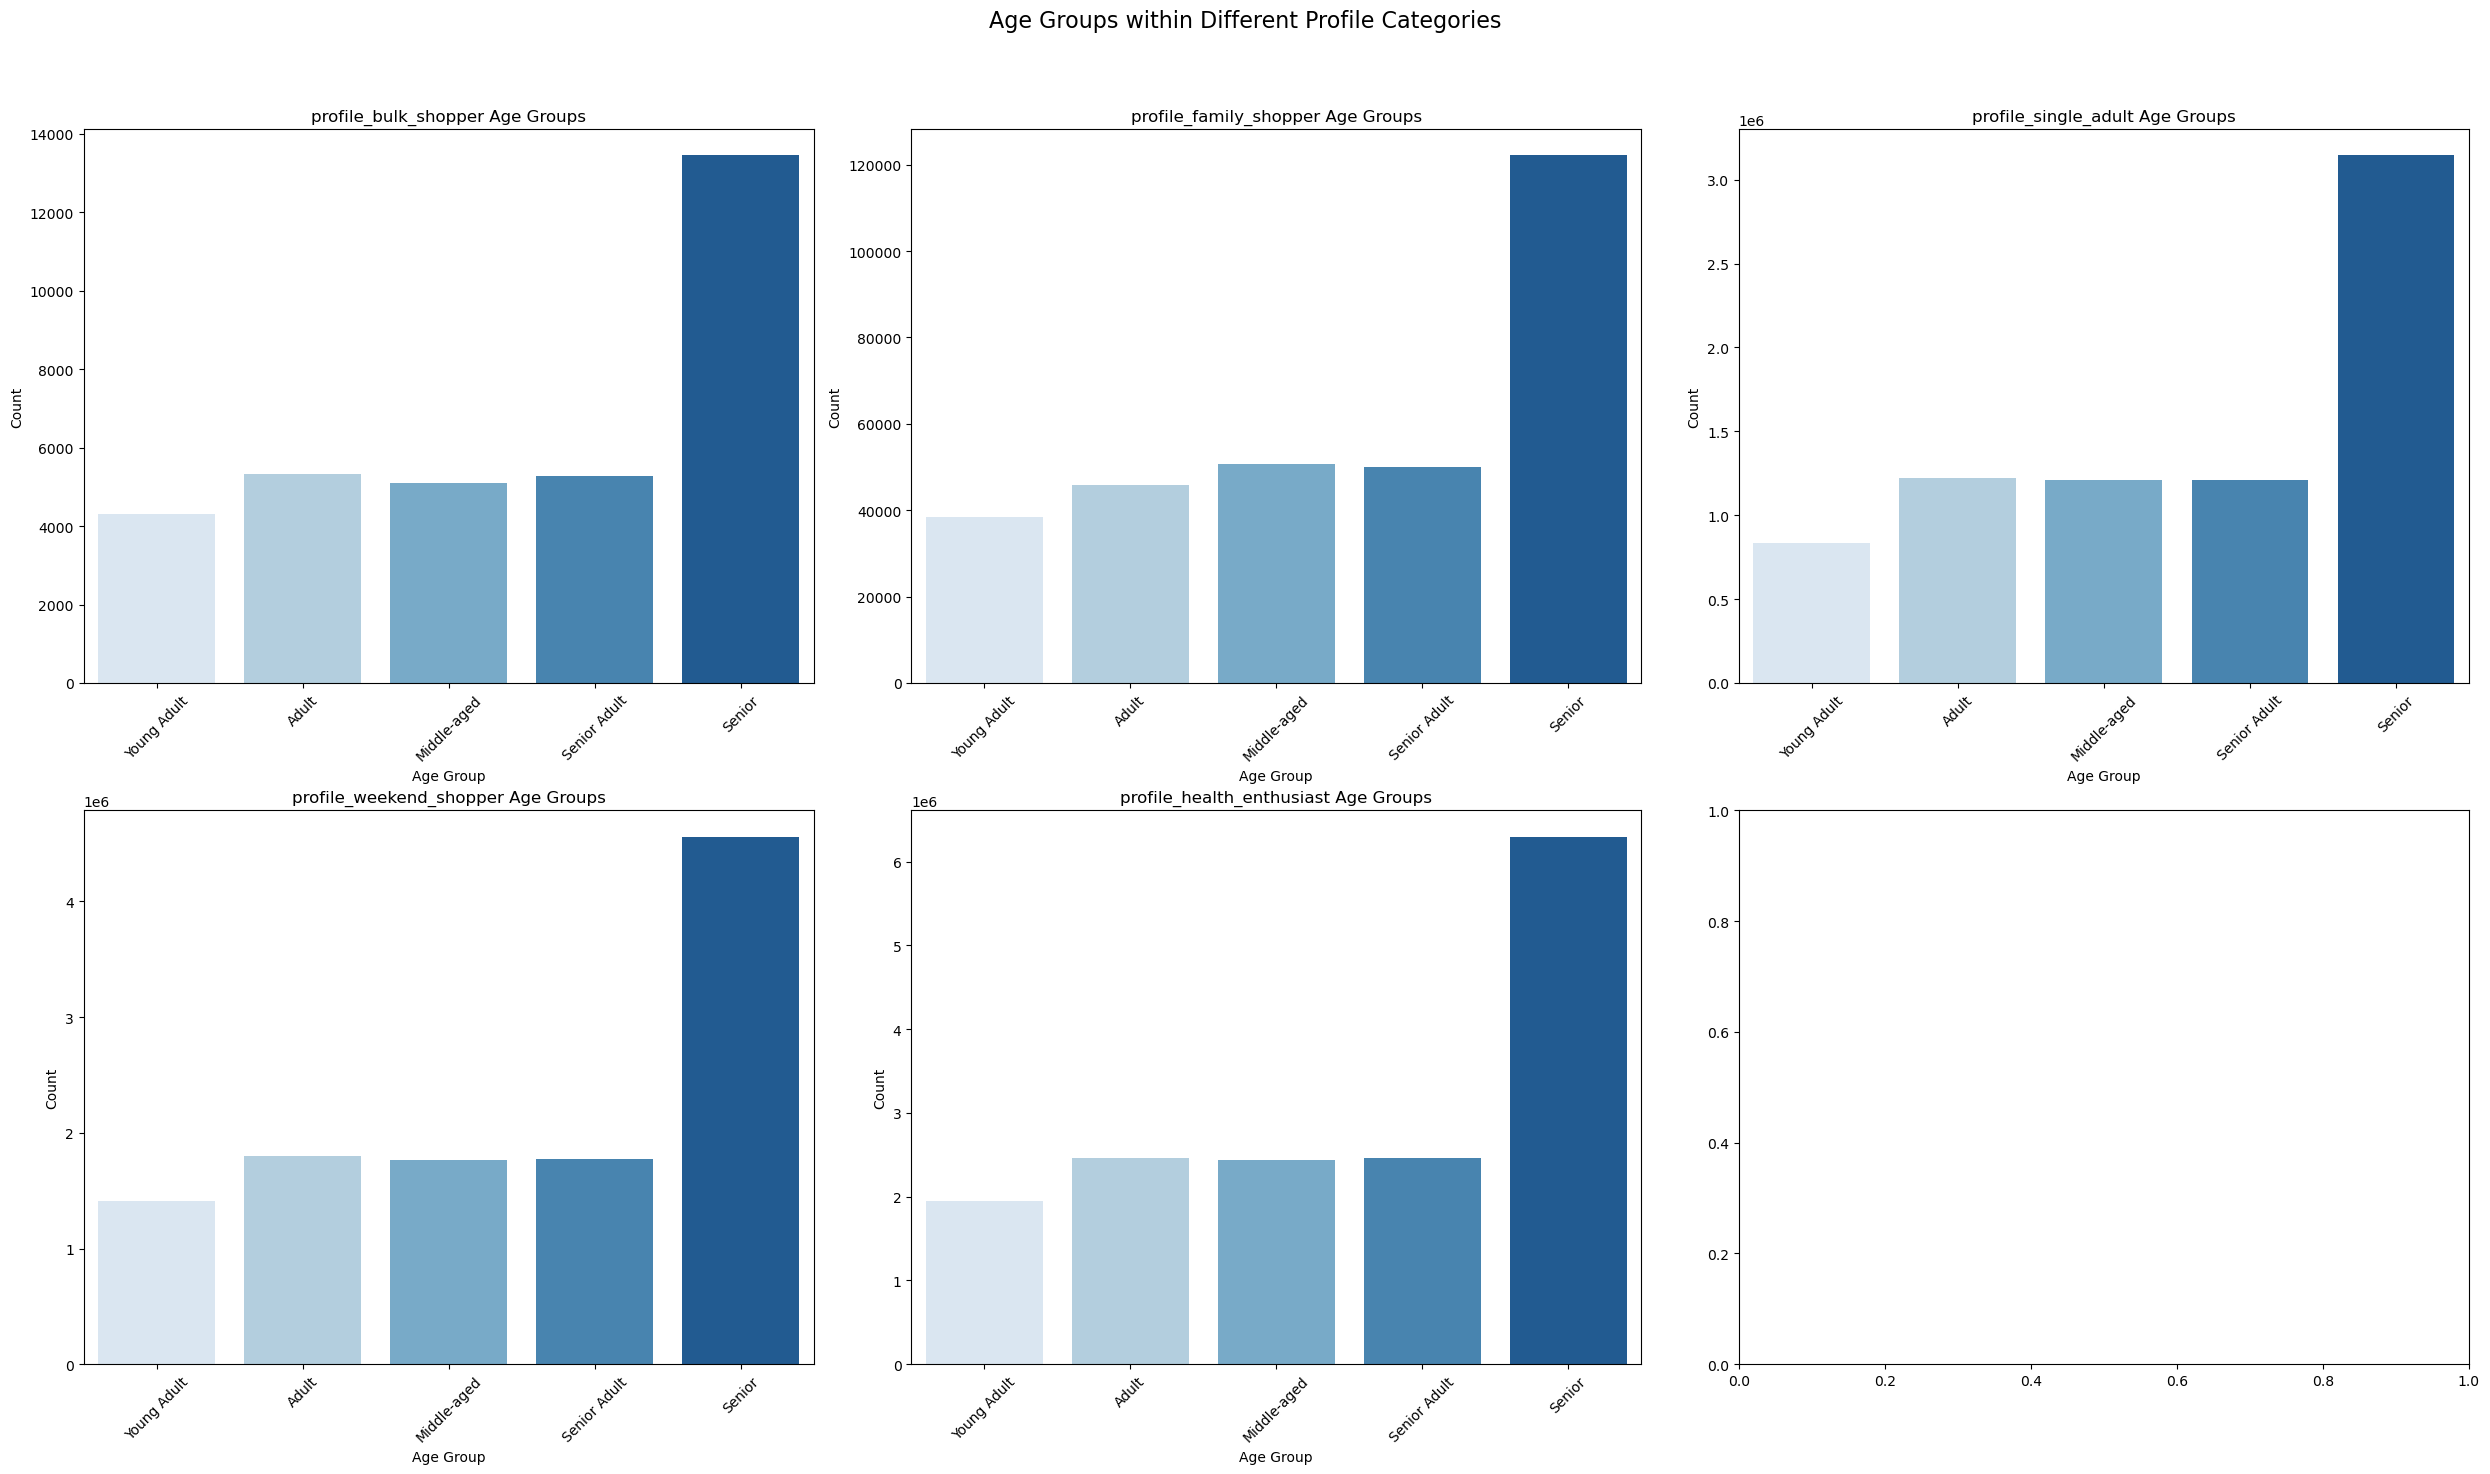

In [131]:
# Create subplots for each profile category
fig, axes = plt.subplots(2, 3, figsize=(25, 15))
fig.suptitle('Age Groups within Different Profile Categories', fontsize=16)

# Calculate the number of rows and columns for subplots
num_profiles = len(profile_columns)
num_rows = (num_profiles - 1) // 3 + 1  # Calculate the number of rows needed
num_cols = min(num_profiles, 3)  # Maximum 3 columns

# Loop through profile categories and create count plots
for i, column in enumerate(profile_columns):
    row, col = i // 3, i % 3
    ax = axes[row, col]
    
    # Filter the DataFrame for rows where the profile category is True
    profile_df = df[df[column]]
    
    # Create a count plot for age groups within the profile category
    sns.countplot(data=profile_df, x='age_profile', ax=ax, palette= "Blues")
    
    # Set the title for the subplot
    ax.set_title(f'{column} Age Groups')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


### Mean order price by customer profile

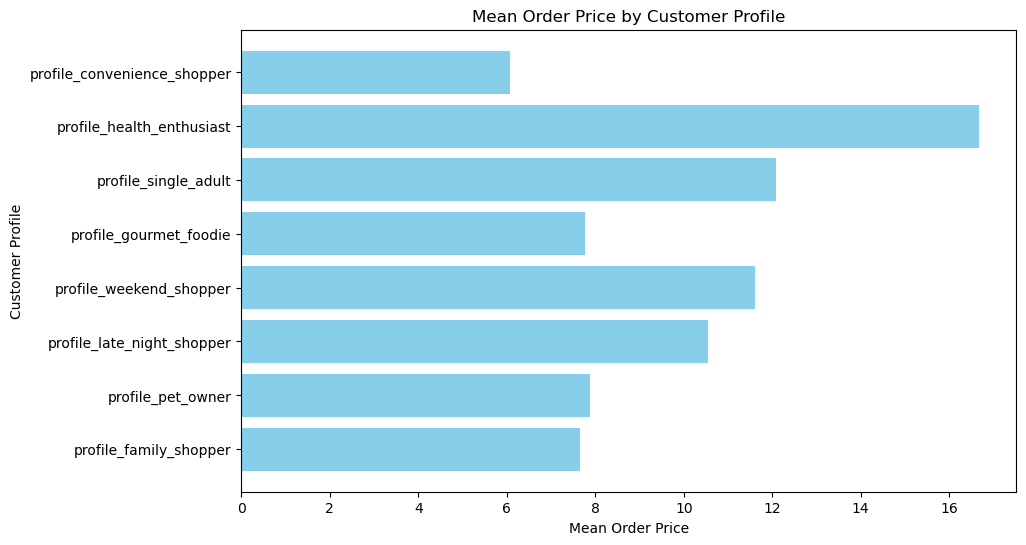

In [105]:
# List of profile columns
profile_columns = ['profile_family_shopper','profile_pet_owner','profile_late_night_shopper','profile_weekend_shopper','profile_gourmet_foodie','profile_single_adult','profile_health_enthusiast','profile_convenience_shopper']
# Create an empty list to store mean order prices for each profile
mean_order_prices = []

# Calculate the mean order price for each profile category
for profile_column in profile_columns:
    profile_mean_price = df[df[profile_column] == True]['prices'].mean()
    mean_order_prices.append(profile_mean_price)

# Create the bar chart
mean_order_price_profile = plt.figure(figsize=(10, 6))
plt.barh(profile_columns, mean_order_prices, color='skyblue')
plt.title('Mean Order Price by Customer Profile')
plt.xlabel('Mean Order Price')
plt.ylabel('Customer Profile')

plt.show()

In [106]:
#export the visualization 
mean_order_price_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'mean_order_price_profile.png'), bbox_inches='tight')

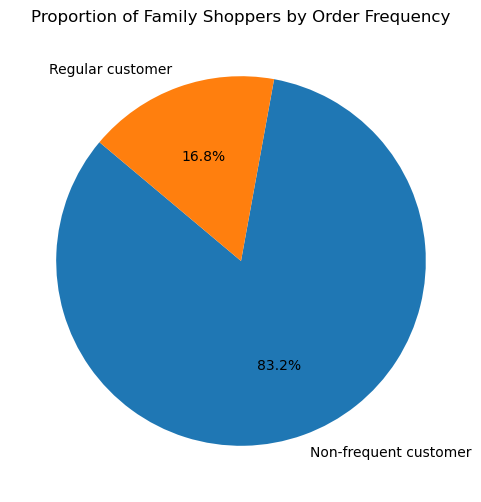

In [136]:
# Count the number of regular and non-frequent family shoppers
family_shopper_counts = df[df['profile_family_shopper'] == True]['order_frequency'].value_counts()

# Create a pie chart
Fam_frequency = plt.figure(figsize=(6, 6))
plt.pie(family_shopper_counts, labels=family_shopper_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Family Shoppers by Order Frequency')

# Show the pie chart
plt.show()

In [137]:
#export the visualization 
Fam_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Fam_frequency.png'))

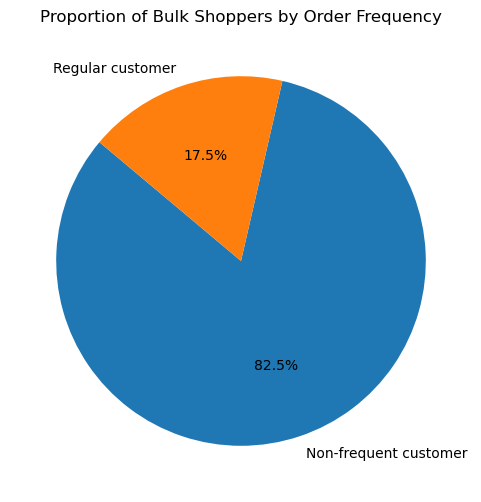

In [91]:
# Count the number of regular and non-frequent family shoppers
bulk_shopper_counts = df[df['profile_bulk_shopper'] == True]['order_frequency'].value_counts()

# Create a pie chart
bulk_frequency = plt.figure(figsize=(6, 6))
plt.pie(bulk_shopper_counts, labels=bulk_shopper_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Bulk Shoppers by Order Frequency')

# Show the pie chart
plt.show()

In [92]:
#export the visualization 
bulk_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'bulk_frequency.png'))

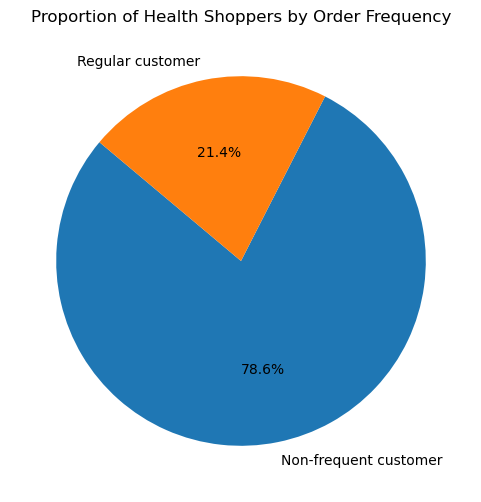

In [90]:
# Count the number of regular and non-frequent family shoppers
health_shopper_counts = df[df['profile_health_enthusiast'] == True]['order_frequency'].value_counts()

# Create a pie chart
health_frequency = plt.figure(figsize=(6, 6))
plt.pie(health_shopper_counts, labels=health_shopper_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Health Shoppers by Order Frequency')

# Show the pie chart
plt.show()

In [93]:
#export the visualization 
health_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'health_frequency.png'))

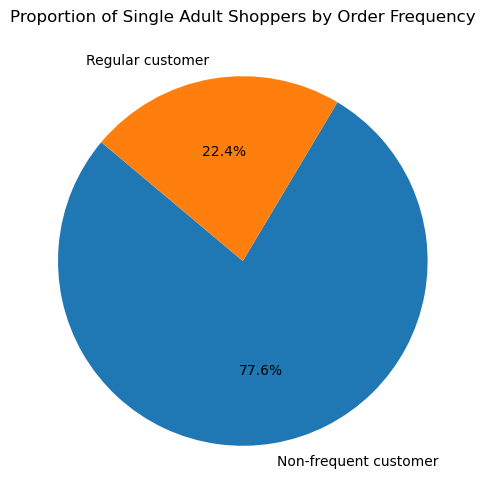

In [94]:
# Count the number of regular and non-frequent family shoppers
single_adult_counts = df[df['profile_single_adult'] == True]['order_frequency'].value_counts()

# Create a pie chart
Single_adult_frequency = plt.figure(figsize=(6, 6))
plt.pie(single_adult_counts, labels=single_adult_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Single Adult Shoppers by Order Frequency')

# Show the pie chart
plt.show()

In [95]:
#export the visualization 
Single_adult_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'Single_adult_frequency.png'))

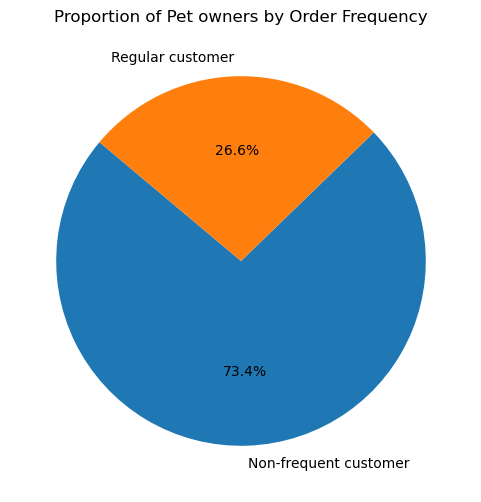

In [96]:
# Count the number of regular and non-frequent pet shoppers
profile_pet_owner_counts = df[df['profile_pet_owner'] == True]['order_frequency'].value_counts()

# Create a pie chart
pet_shopper_frequency = plt.figure(figsize=(6, 6))
plt.pie(profile_pet_owner_counts, labels=profile_pet_owner_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Pet owners by Order Frequency')

# Show the pie chart
plt.show()

In [97]:
#export the visualization 
pet_shopper_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'pet_shopper_frequency.png'))

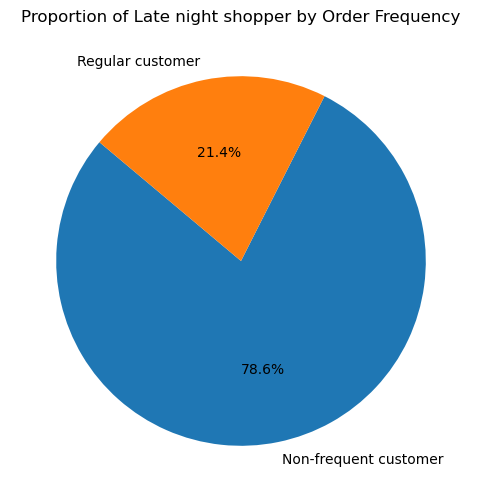

In [98]:
# Count the number of regular and non-frequent pet shoppers
late_night_shopper_counts = df[df['profile_late_night_shopper'] == True]['order_frequency'].value_counts()

# Create a pie chart
ln_shopper_frequency = plt.figure(figsize=(6, 6))
plt.pie(late_night_shopper_counts, labels=late_night_shopper_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Late night shopper by Order Frequency')

# Show the pie chart
plt.show()

In [99]:
#export the visualization 
ln_shopper_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'ln_shopper_frequency.png'))

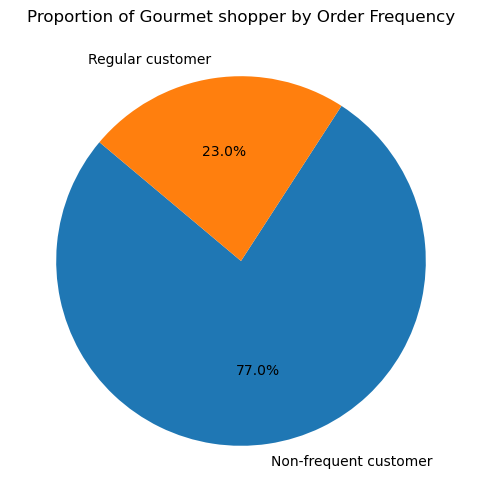

In [86]:
# Count the number of regular and non-frequent pet shoppers
gourmet_foodies_counts = df[df['profile_gourmet_foodie'] == True]['order_frequency'].value_counts()

# Create a pie chart
gourmet_shopper_frequency = plt.figure(figsize=(6, 6))
plt.pie(gourmet_foodies_counts, labels=gourmet_foodies_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Gourmet shopper by Order Frequency')

# Show the pie chart
plt.show()

In [100]:
#export the visualization 
gourmet_shopper_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'gourmet_shopper_frequency.png'))

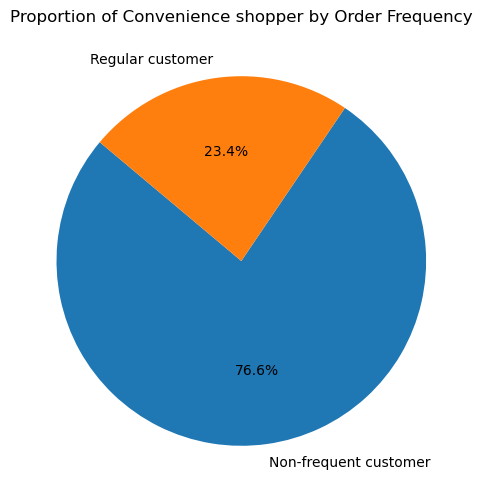

In [84]:
# Count the number of regular and non-frequent pet shoppers
convenience_shopper_counts = df[df['profile_convenience_shopper'] == True]['order_frequency'].value_counts()

# Create a pie chart
profile_convenience_shopper_frequency = plt.figure(figsize=(6, 6))
plt.pie(convenience_shopper_counts, labels=convenience_shopper_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Convenience shopper by Order Frequency')

# Show the pie chart
plt.show()

In [101]:
#export the visualization 
profile_convenience_shopper_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'profile_convenience_shopper_frequency.png'))

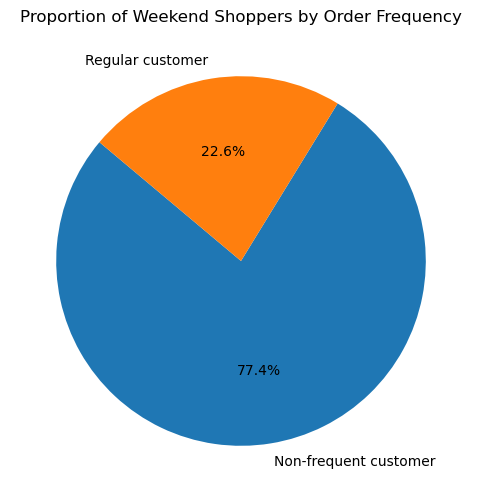

In [85]:
# Count the number of regular and non-frequent family shoppers
profile_weekend_counts = df[df['profile_weekend_shopper'] == True]['order_frequency'].value_counts()

# Create a pie chart
weekend_shopper_frequency = plt.figure(figsize=(6, 6))
plt.pie(profile_weekend_counts, labels=profile_weekend_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Weekend Shoppers by Order Frequency')

# Show the pie chart
plt.show()

In [102]:
#export the visualization 
weekend_shopper_frequency.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'weekend_shopper_frequency.png'))

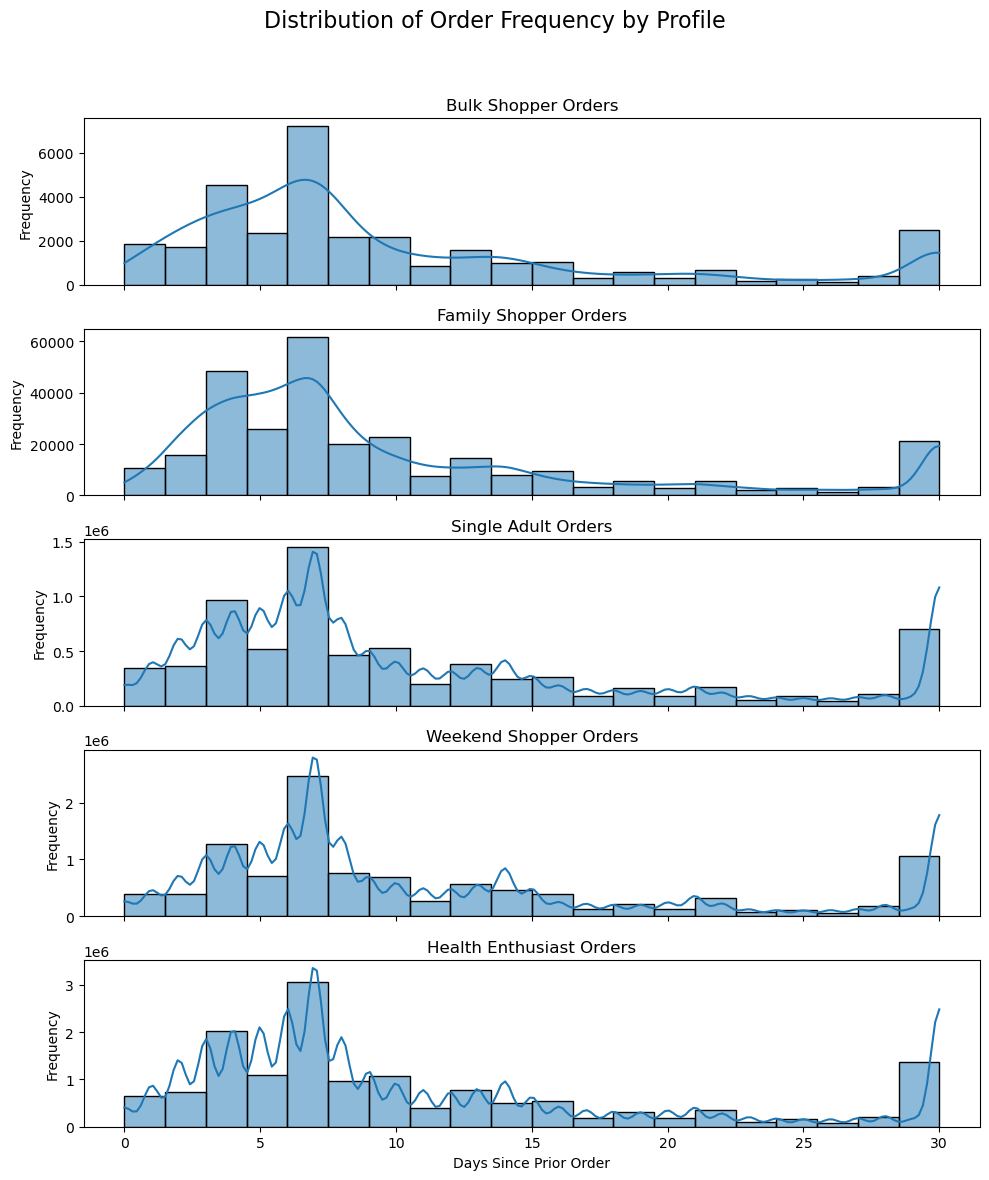

In [147]:
# List of profile columns
profile_columns = [
    'profile_bulk_shopper',
    'profile_family_shopper',
    'profile_single_adult',
    'profile_weekend_shopper',
    'profile_health_enthusiast'
]

# Create subplots for each profile
fig, axes = plt.subplots(len(profile_columns), 1, figsize=(10, 12), sharex=True)

# Set plot title
fig.suptitle('Distribution of Order Frequency by Profile', fontsize=16)

# Loop through each profile and create a histogram
for i, profile_column in enumerate(profile_columns):
    profile_name = profile_column.replace('profile_', '').replace('_', ' ').title()
    
    # Filter the data for the specific profile
    profile_data = df[df[profile_column] == True]['days_since_prior_order'].dropna()
    
    # Create a histogram
    order_freq_by_profile = sns.histplot(profile_data, ax=axes[i], bins=20, kde=True)
    axes[i].set_title(f'{profile_name} Orders')
    axes[i].set_xlabel('Days Since Prior Order')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()

In [148]:
#export the visualization 
order_freq_by_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualisations', 'order_freq_by_profile.png'))